<a href="https://colab.research.google.com/github/HanifaElahi/Mediapipe/blob/main/Pose_Mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Mediapipe Pose***

---


* Human pose estimation from video plays a critical role in various applications such as quantifying physical exercises, sign language recognition, and full-body gesture control. For example, it can form the basis for yoga, dance, and fitness applications. 
* It can also enable the overlay of digital content and information on top of the physical world in augmented reality.
* MediaPipe Pose is a ML solution for high-fidelity body pose tracking, inferring 33 3D landmarks and background segmentation mask on the whole body from RGB video frames utilizing our BlazePose research that also powers the ML Kit Pose Detection API. 
* Current state-of-the-art approaches rely primarily on powerful desktop environments for inference, whereas our method achieves real-time performance on most modern mobile phones, desktops/laptops, in python and even on the web.


### ***ML Pipeline***


---


* The solution utilizes a two-step detector-tracker ML pipeline, proven to be effective in our MediaPipe Hands and MediaPipe Face Mesh solutions. 
* Using a detector, the pipeline first locates the person/pose region-of-interest (ROI) within the frame. 
* The tracker subsequently predicts the pose landmarks and segmentation mask within the ROI using the ROI-cropped frame as input. 
* Note that for video use cases the detector is invoked only as needed, i.e., for the very first frame and when the tracker could no longer identify body pose presence in the previous frame. For other frames the pipeline simply derives the ROI from the previous frame’s pose landmarks.
* The pipeline is implemented as a MediaPipe graph that uses a pose landmark subgraph from the pose landmark module and renders using a dedicated pose renderer subgraph. 
* The pose landmark subgraph internally uses a pose detection subgraph from the pose detection module.




# Models

---



***Person/pose Detection Model (BlazePose Detector)***

* The detector is inspired by our own lightweight BlazeFace model, used in MediaPipe Face Detection, as a proxy for a person detector. 
* It explicitly predicts two additional virtual keypoints that firmly describe the human body center, rotation and scale as a circle. 
* Inspired by Leonardo’s Vitruvian man, we predict the midpoint of a person’s hips, the radius of a circle circumscribing the whole person, and the incline angle of the line connecting the shoulder and hip midpoints.


***Pose Landmark Model (BlazePose GHUM 3D)***

* The landmark model in MediaPipe Pose predicts the location of 33 pose landmarks


# ***Installation***



---



In [ ]:
!pip install mediapipe

# ***Uploading Images***



---



In [ ]:
from google.colab import files

uploaded = files.upload()

Saving pose_1.jpg to pose_1.jpg
Saving pose_2.jpg to pose_2.jpg
Saving pose_3.jpg to pose_3.jpg
Saving pose_4.jpg to pose_4.jpg
Saving pose_5.jpg to pose_5.jpg


# ***Importing Libraries***



---



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

# ***Mediapipe Pose***



---



In [ ]:
#setting desired width and height of images
DESIRED_HEIGHT = 360
DESIRED_WIDTH = 360

In [ ]:
#function to resize and image show
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

pose_1.jpg


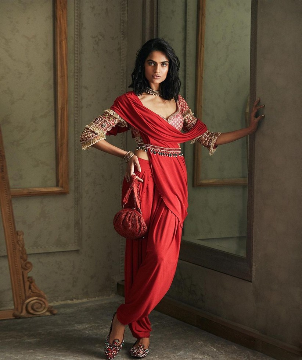

pose_2.jpg


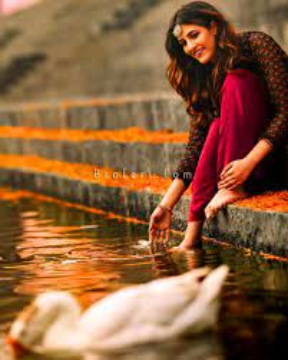

pose_3.jpg


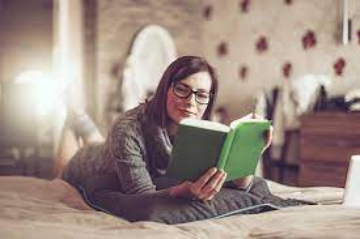

pose_4.jpg


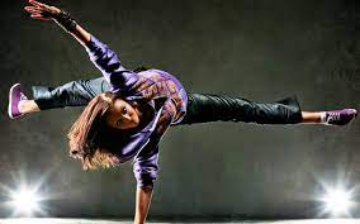

pose_5.jpg


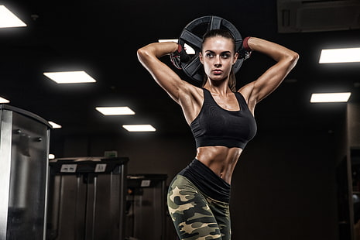

In [ ]:
# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

In [ ]:
#initializing
import mediapipe as mp
mp_pose = mp.solutions.pose

In [ ]:
# Import drawing_utils and drawing_styles.
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

# ***Pose Landmarks***

---



Nose coordinates: (432.33845722675323, 192.7661637365818)
Pose landmarks of pose_1.jpg:


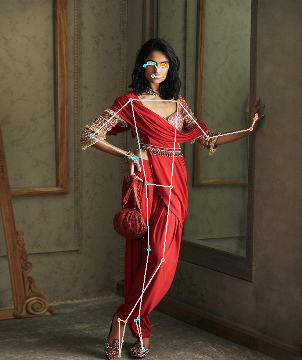

Nose coordinates: (135.07711386680603, 32.55194100737572)
Pose landmarks of pose_2.jpg:


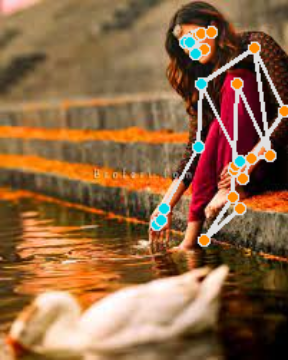

Nose coordinates: (143.3536857366562, 82.79513356089592)
Pose landmarks of pose_3.jpg:


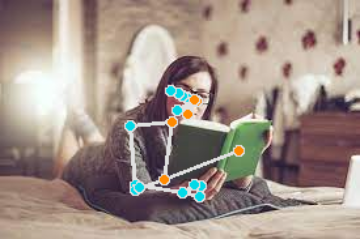

Nose coordinates: (102.90835273265839, 90.03144121170044)
Pose landmarks of pose_4.jpg:


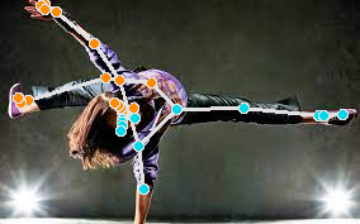

Nose coordinates: (282.5931340456009, 82.5332361459732)
Pose landmarks of pose_5.jpg:


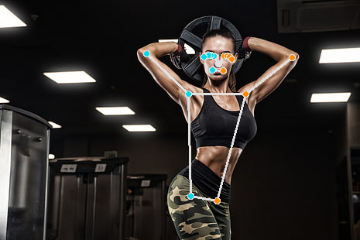

In [ ]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)
    cv2.imwrite('annotated_image' + str(name), annotated_image)

# ***3D Pose World Landmarks***

---


Nose world landmark:
x: -0.010797886177897453
y: -0.5461876392364502
z: -0.23612137138843536
visibility: 0.9999790191650391



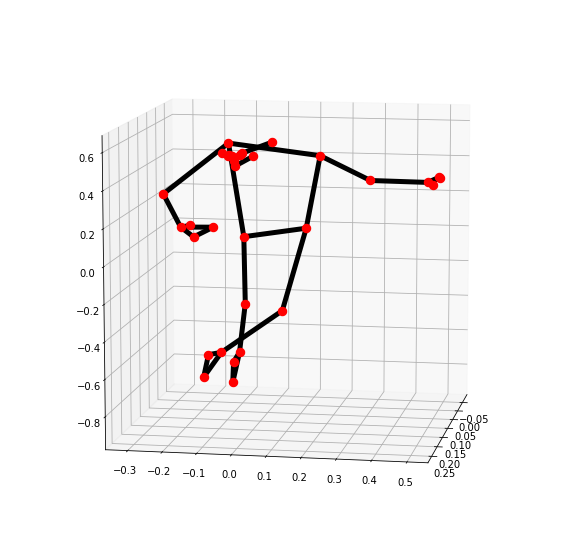

Nose world landmark:
x: -0.2801060378551483
y: -0.3979662358760834
z: -0.18367773294448853
visibility: 0.9998397827148438



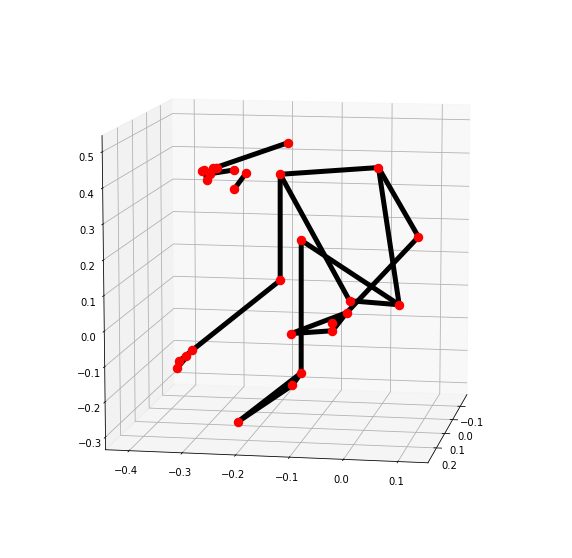

Nose world landmark:
x: 0.19790196418762207
y: -0.32398465275764465
z: -0.42685773968696594
visibility: 0.9998437166213989



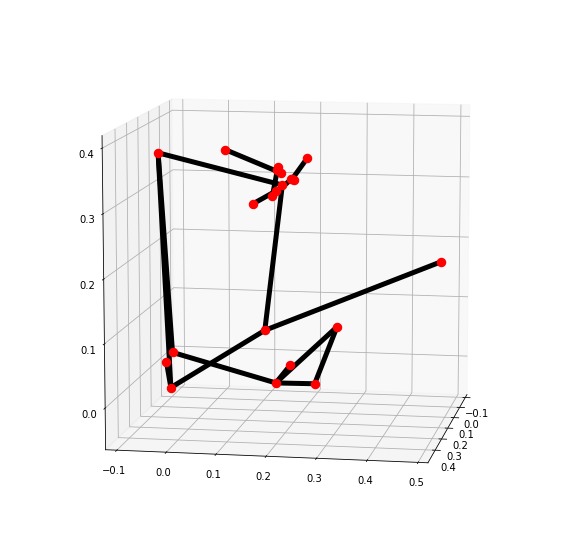

Nose world landmark:
x: -0.11372043192386627
y: 0.09167452156543732
z: -0.7886492609977722
visibility: 0.9999996423721313



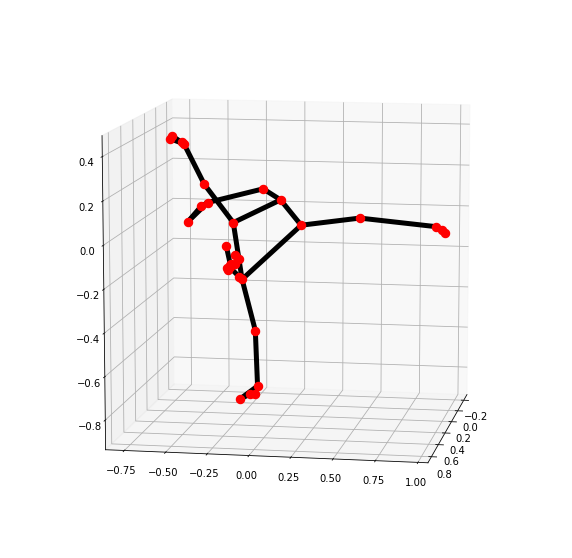

Nose world landmark:
x: 0.04563053324818611
y: -0.5841787457466125
z: -0.3650820255279541
visibility: 0.9999023675918579



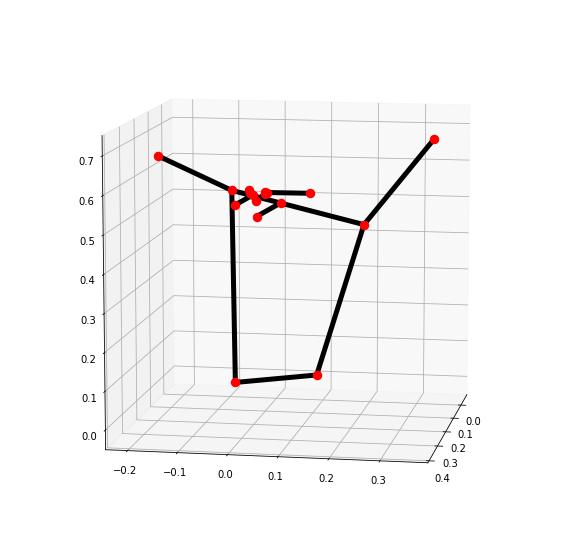

In [ ]:
# Run MediaPipe Pose and plot 3d pose world landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:'),
    print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])
    
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

# ***Pose Segmentation***

---


Pose segmentation of pose_1.jpg:


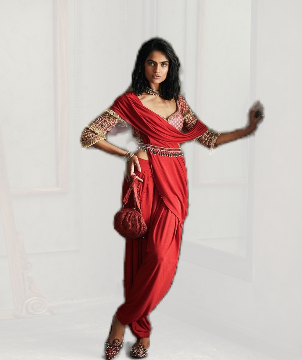

Pose segmentation of pose_2.jpg:


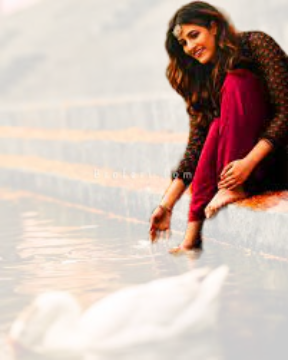

Pose segmentation of pose_3.jpg:


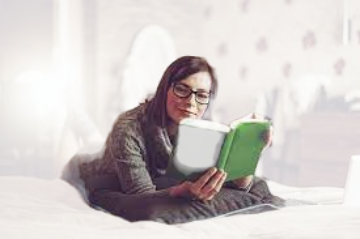

Pose segmentation of pose_4.jpg:


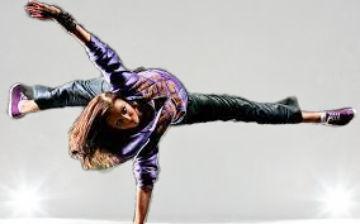

Pose segmentation of pose_5.jpg:


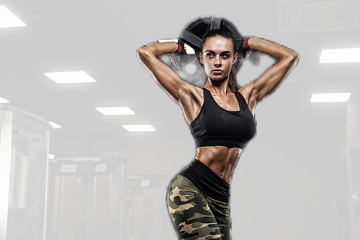

In [ ]:
# Run MediaPipe Pose with `enable_segmentation=True` to get pose segmentation.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, 
    model_complexity=2, enable_segmentation=True) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw pose segmentation.
    print(f'Pose segmentation of {name}:')
    annotated_image = image.copy()
    red_img = np.zeros_like(annotated_image, dtype=np.uint8)
    red_img[:, :] = (255,255,255)
    segm_2class = 0.2 + 0.8 * results.segmentation_mask
    segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
    annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
    resize_and_show(annotated_image)
    cv2.imwrite('pose_selfie_segmentated' + str(name), annotated_image)

# **Source**:


---


1. https://colab.research.google.com/drive/1uCuA6We9T5r0WljspEHWPHXCT_2bMKUy#scrollTo=FMJBvXvw-NsF
2. https://google.github.io/mediapipe/solutions/pose.html